# Machine Learning Models and Object Classification
- Translation to Vectors: Imagine you have a library where books are organized by topics using a system like the Dewey Decimal System. Each book has a specific place based on its topic. Similarly, machine learning models translate data into vectors (a type of data representation) and place them in a "vector space" based on their meaning.

- Machine Learning Models: These models, often neural networks, learn to identify and understand different data objects (like images or text). They translate similar objects into vectors that are close together and dissimilar objects into vectors that are farther apart. This helps retain the meaning of the data when it's converted into vectors.

- Vector Databases: Vector databases use these AI-generated vectors to perform searches. For example, if you search for "spicy food recipes," the database will find vectors (data points) that are close to this concept in the vector space, giving you relevant results.


In essence, machine learning models help convert complex data into a format that computers can understand and work with efficiently, making searches faster and more accurate.

# Translating data from human to machine-understandable

- Machine Learning Models: Think of these models as very smart programs that learn to recognize patterns. For example, they can look at millions of pictures of stop signs and learn what features make a stop sign (like its shape, color, and text).

- Vectors: These are like special codes or numbers that represent data. When the model sees a stop sign, it converts the features it recognizes into a vector, a kind of unique fingerprint for that stop sign.

- Text Understanding: For text, imagine filling in blanks in sentences. If you see "The ___ howled at the moon," you know "wolf" fits. Models learn this by practicing with millions of sentences, understanding which words fit together.

- Vector Databases: These databases store all these vectors. When you search for something, the database finds vectors (data points) that are similar to your search, giving you accurate results.


In short, machine learning models turn complex data (like images and text) into simple numerical codes (vectors) that computers can easily understand and use for fast, accurate searches.

# ML models and vector embeddings

In [15]:
import pickle
import os
import json
import weaviate
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [16]:
# Connect to the locallay launched instance of Weaviate
client = weaviate.Client("http://localhost:8080")

print(f"Client is ready: {client.is_ready()}")

Client is ready: True


In [17]:
# Check and delete already existed class
current_schema = client.schema.get()['classes']

for schema in current_schema:
    if schema['class'] == 'ClipExample':
        client.schema.delete_class(schema['class'])

In [18]:
# create a class object that use multi2vec module  
class_object = {
    "class": "ClipExample",
    "moduleConfig": {
        "multi2vec-clip": {"imageFields": ["image"]},
    },
    "vectorizer" : "multi2vec-clip",
    "properties": [
        {
            "name": "text",
            "dataType": ["string"]
        },
        {
            "name": "image",
            "dataType": ["blob"]
        }
    ]
}

client.schema.create_class(class_object)
print("Class created")

Class created


In [19]:
# Add images to our created class
image_folder = r"D:/Vector Databases/vector-databases-certification/03 Machine Learning Vectors/Images"

for imgs in os.listdir(image_folder):
    encoded_image = weaviate.util.image_encoder_b64(f"{image_folder}/{imgs}")
    data_properties = {
        "text": imgs,
        "image": encoded_image
    }
    try:
        client.data_object.create(data_properties, "ClipExample")
        print(f"Image {imgs} added")
    except weaviate.exceptions.UnexpectedStatusCodeException as e:
        print(f"Failed to add image {imgs}: {e}")

print("All images processed")

Image Big Sur_ California_LIL_9678.jpg added
Image Bird feeder_LIL_134172.jpg added
Image Blue sky between skyscrapers_LIL_134160.jpg added
Image Cats on a chair_LIL_134151.jpg added
Image Cat_LIL_134138.jpg added
Image Cherry_LIL_134126.jpg added
Image Cityscape_LIL_134155.jpg added
Image Conservatory_LIL_9680.jpg added
Image Deer_LIL_134180.jpg added
Image Dog in motion_LIL_134175.jpg added
Image Feet under a skirt_LIL_134201.jpg added
Image Forest_LIL_134133.jpg added
Image Golden Gate Bridge from Presidio_LIL_9682.jpg added
Image Joshua Tree and California coast_LIL_9662.jpg added
Image Joshua Tree and California coast_LIL_9670.jpg added
Image Kitchen scene_LIL_134191.jpg added
Image Llama_LIL_134178.jpg added
Image Microphone_LIL_134215.jpg added
Image On a grassy hill_LIL_134221.jpg added
Image Onlookers contemplating_LIL_134225.jpg added
Image Ornate furniture_LIL_134195.jpg added
Image Pies and dishes_LIL_134217.jpg added
Image Point Reyes_ California_LIL_9672.jpg added
Image R

In [20]:
# Search images using a text query
query_image = (
    client.query
    .get('ClipExample', ['text', "_additional {distance}"])
    .with_near_text({"concepts": "open sea beach"})
    .with_limit(5)
    .do()
)

print(json.dumps(query_image, indent=2))

{
  "data": {
    "Get": {
      "ClipExample": [
        {
          "_additional": {
            "distance": 0.7255122
          },
          "text": "Point Reyes_ California_LIL_9672.jpg"
        },
        {
          "_additional": {
            "distance": 0.73806083
          },
          "text": "Big Sur_ California_LIL_9678.jpg"
        },
        {
          "_additional": {
            "distance": 0.77664655
          },
          "text": "Walking dog on beach_LIL_134163.jpg"
        },
        {
          "_additional": {
            "distance": 0.7825915
          },
          "text": "On a grassy hill_LIL_134221.jpg"
        },
        {
          "_additional": {
            "distance": 0.79671466
          },
          "text": "Golden Gate Bridge from Presidio_LIL_9682.jpg"
        }
      ]
    }
  }
}


In [27]:
# View those images
for img in query_image['data']['Get']['ClipExample']:
    print(f"Image: {img['text']}")

Image: Forest_LIL_134133.jpg
Image: Golden Gate Bridge from Presidio_LIL_9682.jpg
Image: Spiral staircase_LIL_134156.jpg
Image: On a grassy hill_LIL_134221.jpg
Image: Conservatory_LIL_9680.jpg


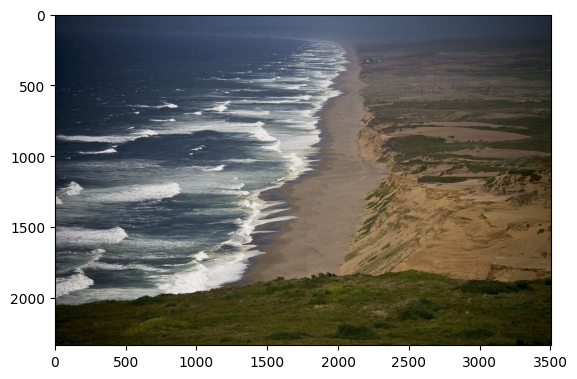

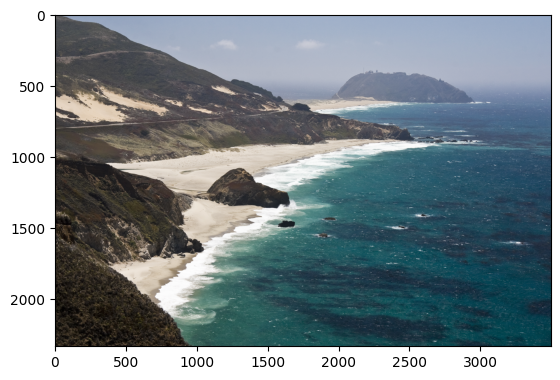

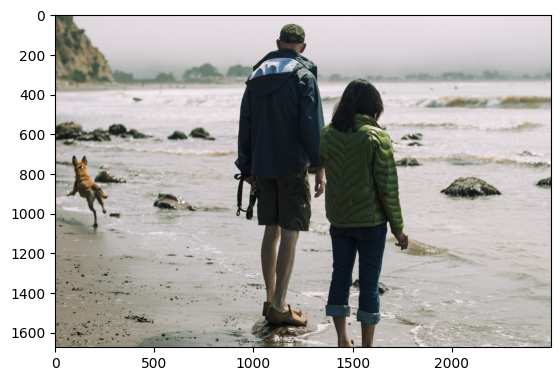

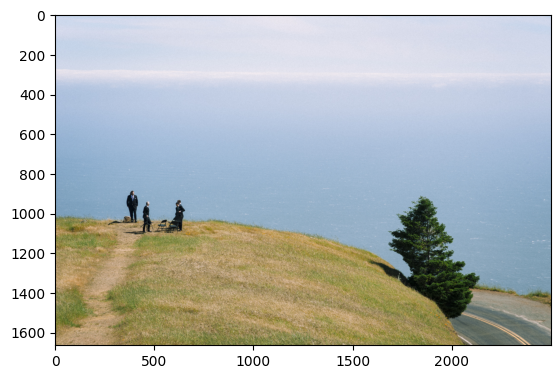

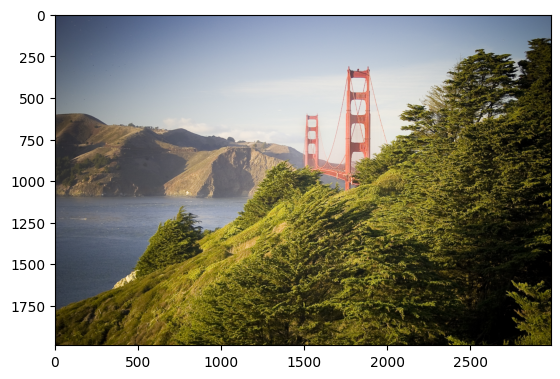

In [22]:
# Display those images from Images Folder
for img in query_image['data']['Get']['ClipExample']:
    img_name = img['text']
    img_path = f"{image_folder}/{img_name}"
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.show()

{
  "data": {
    "Get": {
      "ClipExample": [
        {
          "_additional": {
            "distance": 0.73219836
          },
          "text": "Forest_LIL_134133.jpg"
        },
        {
          "_additional": {
            "distance": 0.776168
          },
          "text": "Golden Gate Bridge from Presidio_LIL_9682.jpg"
        },
        {
          "_additional": {
            "distance": 0.7912662
          },
          "text": "Spiral staircase_LIL_134156.jpg"
        },
        {
          "_additional": {
            "distance": 0.7932053
          },
          "text": "On a grassy hill_LIL_134221.jpg"
        },
        {
          "_additional": {
            "distance": 0.79536104
          },
          "text": "Conservatory_LIL_9680.jpg"
        }
      ]
    }
  }
}


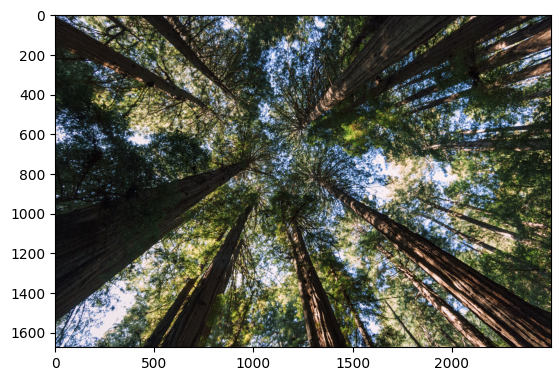

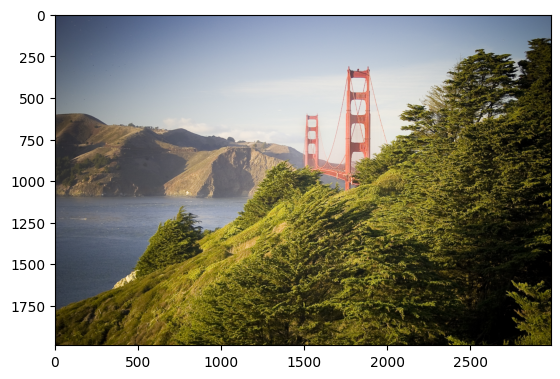

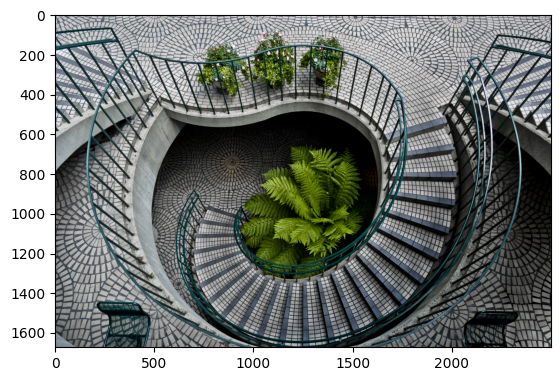

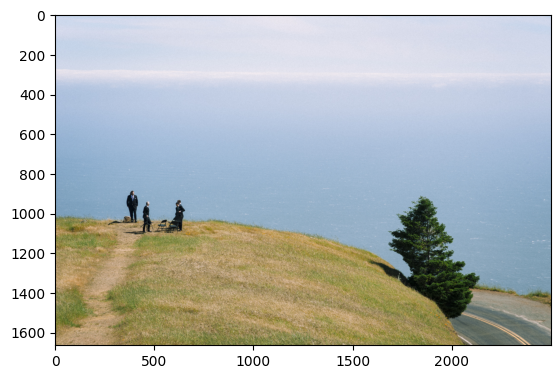

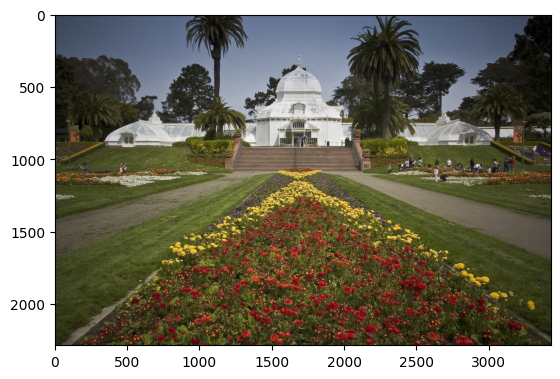

In [23]:
# Search for another images with different images and display those images from the folder
query_image = (
    client.query
    .get('ClipExample', ['text', "_additional {distance}"])
    .with_near_text({"concepts": "trees"})
    .with_limit(5)
    .do()
)

print(json.dumps(query_image, indent=2))


for img in query_image['data']['Get']['ClipExample']:
    img_name = img['text']
    img_path = f"{image_folder}/{img_name}"
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.show()

# Image to Image Search

In [28]:
test_image_folder = r"D:/Vector Databases/vector-databases-certification/03 Machine Learning Vectors/TestImages"

if os.path.exists(test_image_folder):
    test_image_names = os.listdir(test_image_folder)
else:
    print("Directory does not exist.")
test_image_names = os.listdir(test_image_folder)

print(test_image_names)

['Alone in office building _LIL_134159.jpg', 'Armchair and curtains_LIL_134205.jpg', 'Beach with a building_LIL_134146.jpg', 'Birds on utility lines_LIL_134174.jpg', 'Cat outside_LIL_134200.jpg', 'Coit Tower_LIL_9679.jpg', 'Dog_LIL_134140.jpg', 'Duck_LIL_134179.jpg', 'Guitar_LIL_134218.jpg', 'Joshua Tree and California coast_LIL_9671.jpg', 'Laundromat_LIL_134220.jpg']


In [29]:
# Test Image = Beach with a building_LIL_134146.jpg
query_image = (
    client.query
    .get('ClipExample', ['text', "_additional {distance}"])
    .with_near_image({"image": "D:/Vector Databases/vector-databases-certification/03 Machine Learning Vectors/TestImages/Beach with a building_LIL_134146.jpg"})
    .with_limit(5)
    .do()
)

print(json.dumps(query_image, indent=2))

{
  "data": {
    "Get": {
      "ClipExample": [
        {
          "_additional": {
            "distance": 0.22762138
          },
          "text": "Big Sur_ California_LIL_9678.jpg"
        },
        {
          "_additional": {
            "distance": 0.26042074
          },
          "text": "Golden Gate Bridge from Presidio_LIL_9682.jpg"
        },
        {
          "_additional": {
            "distance": 0.27988154
          },
          "text": "Point Reyes_ California_LIL_9672.jpg"
        },
        {
          "_additional": {
            "distance": 0.2816937
          },
          "text": "On a grassy hill_LIL_134221.jpg"
        },
        {
          "_additional": {
            "distance": 0.2896188
          },
          "text": "Forest_LIL_134133.jpg"
        }
      ]
    }
  }
}


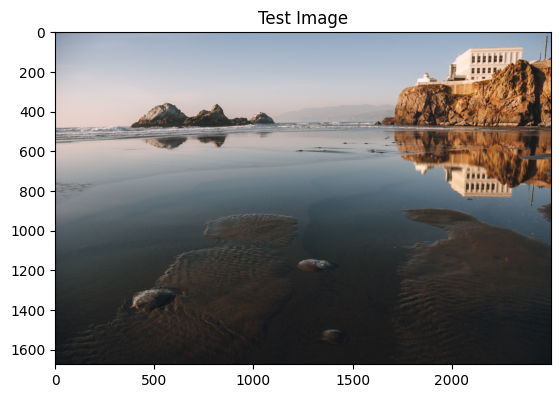

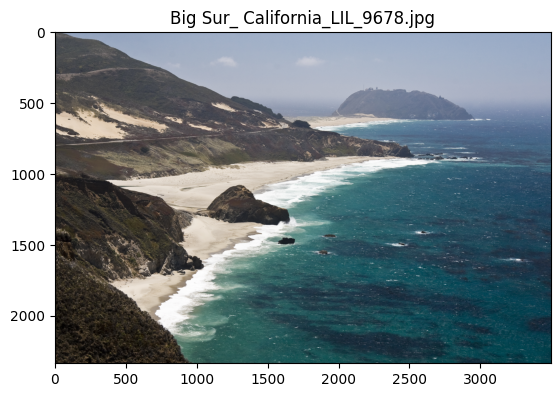

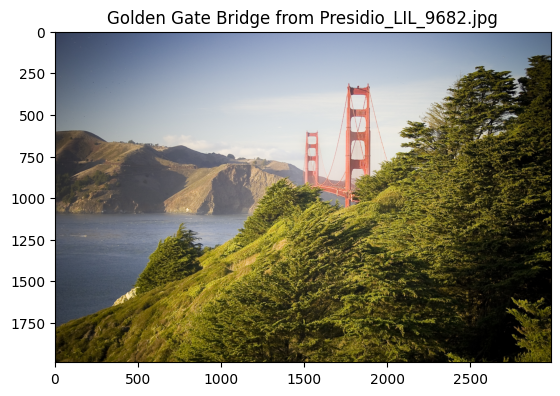

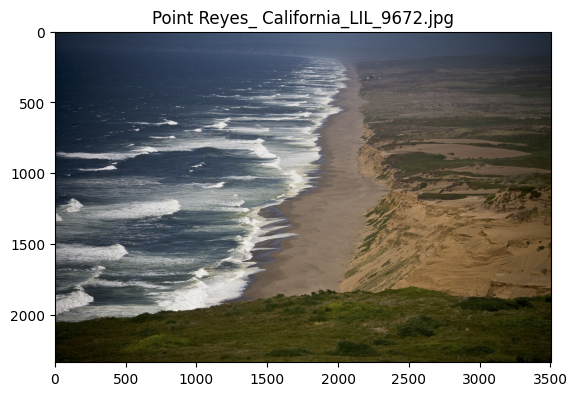

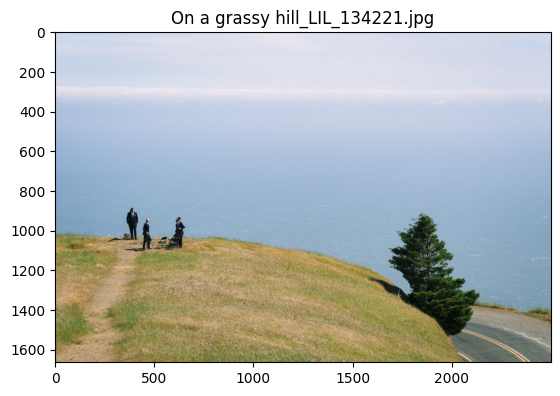

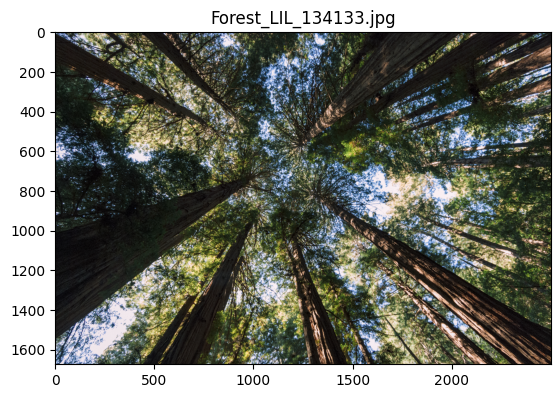

In [ ]:
# Compare test image with all images in the dataset and return the most similar image and plot it
test_img = mpimg.imread("D:/Vector Databases/vector-databases-certification/03 Machine Learning Vectors/TestImages/Beach with a building_LIL_134146.jpg")
imgplot = plt.imshow(test_img)
plt.title("Test Image")
plt.show()

for img in query_image['data']['Get']['ClipExample']:
    img_name = img['text']
    img_path = f"{image_folder}/{img_name}"
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.title(img_name)
    plt.show()

In [ ]:
# Test Image = Beach with a building_LIL_134146.jpg
query_image = (
    client.query
    .get('ClipExample', ['text', "_additional {distance}"])
    .with_near_image({"image": "D:/Vector Databases/vector-databases-certification/03 Machine Learning Vectors/TestImages/Cat outside_LIL_134200.jpg"})
    .with_limit(5)
    .do()
)

print(json.dumps(query_image, indent=2))

{
  "data": {
    "Get": {
      "ClipExample": [
        {
          "_additional": {
            "distance": 0.12137908
          },
          "text": "Cat_LIL_134138.jpg"
        },
        {
          "_additional": {
            "distance": 0.22747856
          },
          "text": "Cats on a chair_LIL_134151.jpg"
        },
        {
          "_additional": {
            "distance": 0.28133702
          },
          "text": "Bird feeder_LIL_134172.jpg"
        },
        {
          "_additional": {
            "distance": 0.31132615
          },
          "text": "Dog in motion_LIL_134175.jpg"
        },
        {
          "_additional": {
            "distance": 0.31550384
          },
          "text": "Feet under a skirt_LIL_134201.jpg"
        }
      ]
    }
  }
}


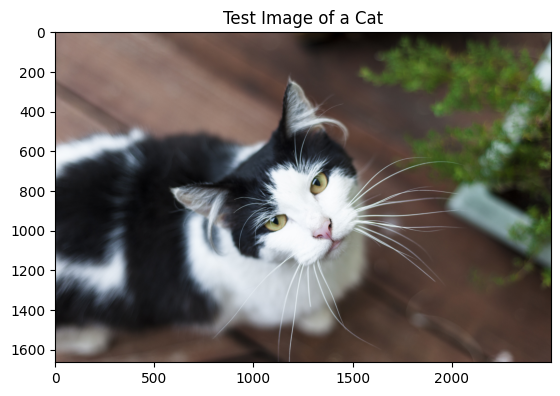

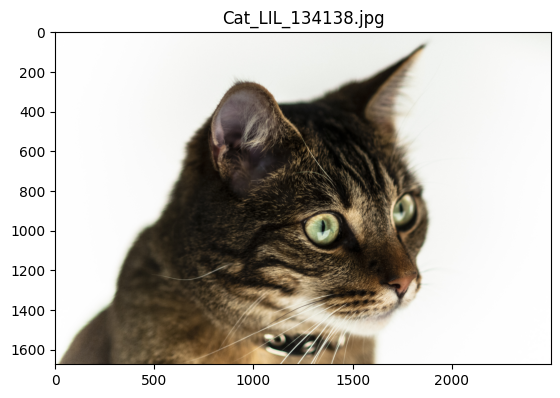

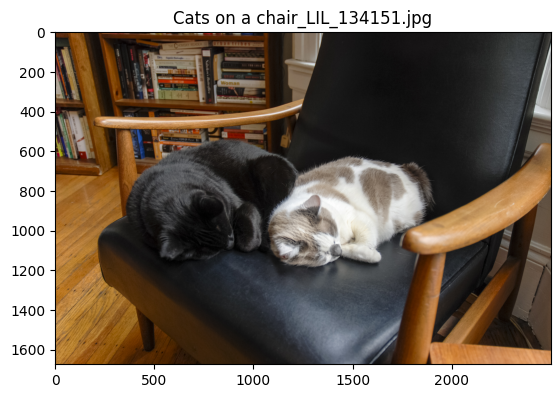

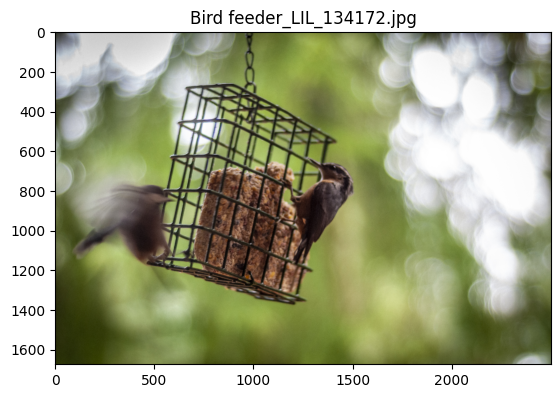

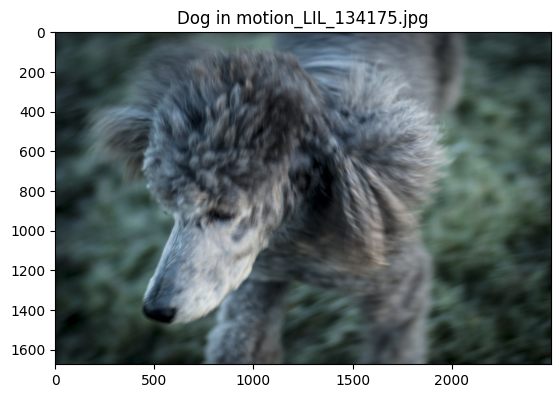

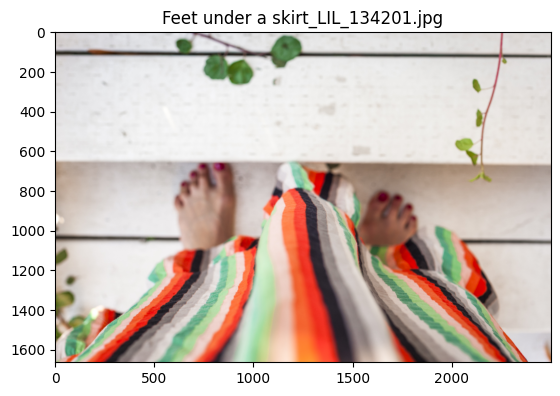

In [ ]:
# Another image query search with test image of a cat
test_img = mpimg.imread("D:/Vector Databases/vector-databases-certification/03 Machine Learning Vectors/TestImages/Cat outside_LIL_134200.jpg")
imgplot = plt.imshow(test_img)
plt.title("Test Image of a Cat")
plt.show()

for img in query_image['data']['Get']['ClipExample']:
    img_name = img['text']
    img_path = f"{image_folder}/{img_name}"
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.title(img_name)
    plt.show()